<a href="https://colab.research.google.com/github/scanavi31/Bootcamp/blob/main/Colab/Talleres/Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## TALLER TRANSFORMACIONES

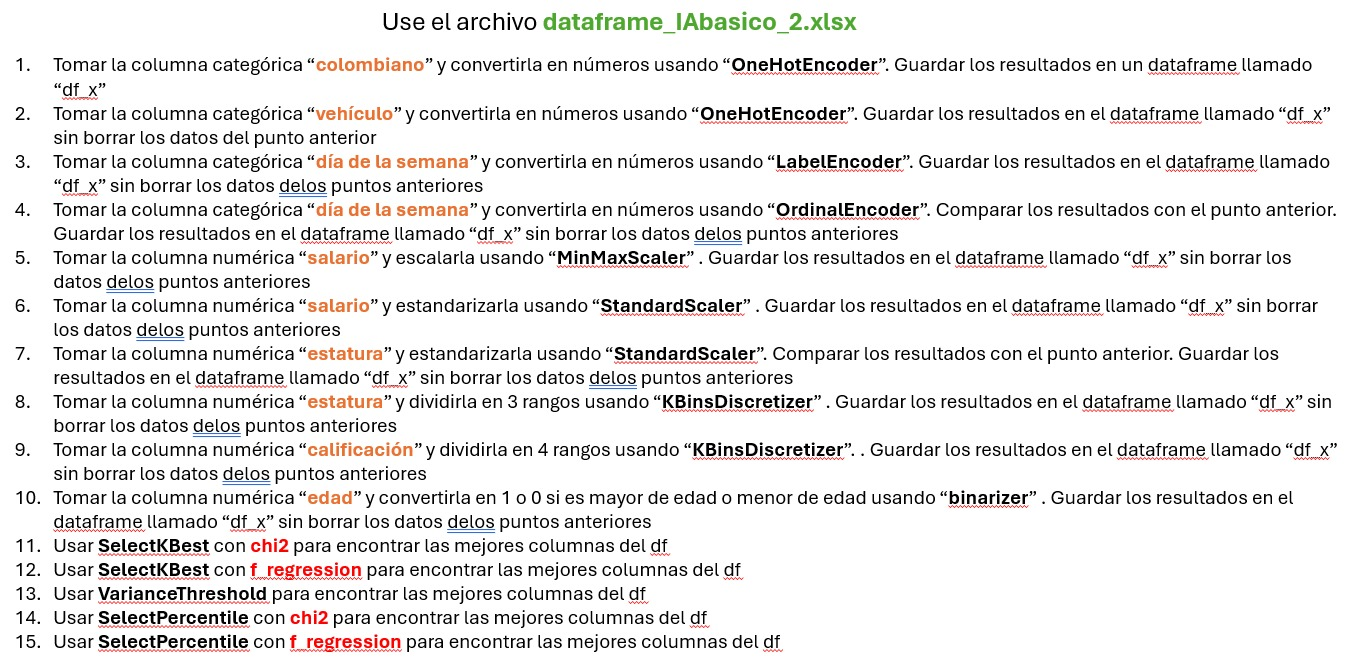

In [ ]:
import pandas as pd

df = pd.read_excel('/content/dataframe_IAbasico_2.xlsx')
df.head()

,colombiano,vehiculo,dia de la semana,salario,estatura,calificación,edad
0,si,bus,miercoles,1300000.0,1.70,3.0,23.0
1,no,bus,viernes,1300000.0,1.75,3.0,23.0
2,no,auto,lunes,2500000.0,1.74,3.0,25.0
3,si,moto,jueves,2000000.0,1.53,3.0,23.0
4,si,moto,domingo,3000000.0,1.80,3.5,28.0


In [ ]:
# prompt: generar condicional para cargar el archivo si estoy en colab o en local

import pandas as pd
import sys

try:
  from google.colab import drive
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  df = pd.read_excel('/content/dataframe_IAbasico_2.xlsx')
else:
  df = pd.read_excel('dataframe_IAbasico_2.xlsx')

df.head()


,colombiano,vehiculo,dia de la semana,salario,estatura,calificación,edad
0,si,bus,miercoles,1300000.0,1.70,3.0,23.0
1,no,bus,viernes,1300000.0,1.75,3.0,23.0
2,no,auto,lunes,2500000.0,1.74,3.0,25.0
3,si,moto,jueves,2000000.0,1.53,3.0,23.0
4,si,moto,domingo,3000000.0,1.80,3.5,28.0


In [ ]:
# prompt: si la ruta en windows local es d:\carpeta\dataset como hacer para que quede d:/carpeta/dataset

windows_path = r'd:\carpeta\dataset'
linux_path = windows_path.replace('\\', '/')
print(linux_path)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   colombiano        97 non-null     object 
 1   vehiculo          98 non-null     object 
 2   dia de la semana  97 non-null     object 
 3   salario           99 non-null     float64
 4   estatura          99 non-null     float64
 5   calificación      100 non-null    float64
 6   edad              98 non-null     float64
dtypes: float64(4), object(3)
memory usage: 5.6+ KB


In [ ]:
df.describe()

,salario,estatura,calificación,edad
count,9.900000e+01,99.000000,100.000000,98.000000
mean,2.780808e+06,1.697879,3.367000,24.908163
std,3.790743e+06,0.079927,0.734442,6.249267
min,1.300000e+06,1.450000,1.500000,17.000000
25%,1.300000e+06,1.670000,2.800000,21.000000
50%,2.000000e+06,1.690000,3.400000,23.000000
75%,3.000000e+06,1.740000,3.900000,28.000000
max,3.000000e+07,1.900000,5.000000,50.000000


In [ ]:
df.describe(include='object')

,colombiano,vehiculo,dia de la semana
count,97,98,97
unique,2,3,9
top,si,bus,lunes
freq,51,46,29


In [ ]:
for col in df.select_dtypes(include=['object']):
  print(f"Column {col}: {df[col].unique()}")

Column colombiano: ['si' 'no' nan]
Column vehiculo: ['bus' 'auto' 'moto' nan]
Column dia de la semana: ['miercoles' 'viernes' 'lunes' 'jueves' 'domingo' 'sabado' 'martes' nan
 'miércoles' 'sábado']


In [ ]:
df['dia de la semana'] = df['dia de la semana'].str.lower().replace({'miercoles': 'miércoles', 'sabado': 'sábado'})

In [ ]:
for col in df.select_dtypes(include=['object']):
  print(f"Column {col}: {df[col].unique()}")

Column colombiano: ['si' 'no' nan]
Column vehiculo: ['bus' 'auto' 'moto' nan]
Column dia de la semana: ['miércoles' 'viernes' 'lunes' 'jueves' 'domingo' 'sábado' 'martes' nan]


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
colombiano,3
vehiculo,2
dia de la semana,3
salario,1
estatura,1
calificación,0
edad,2


In [ ]:
# Rellenar valores nulos en columnas categóricas con la moda
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna(df[column].mode()[0])

In [ ]:
# Rellenar valores nulos en columnas numéricas con la media
for column in df.select_dtypes(include=['number']):
    df[column] = df[column].fillna(df[column].mean())

In [ ]:
df.isnull().sum()

,0
colombiano,0
vehiculo,0
dia de la semana,0
salario,0
estatura,0
calificación,0
edad,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 97
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   colombiano        81 non-null     object 
 1   vehiculo          81 non-null     object 
 2   dia de la semana  81 non-null     object 
 3   salario           81 non-null     float64
 4   estatura          81 non-null     float64
 5   calificación      81 non-null     float64
 6   edad              81 non-null     float64
dtypes: float64(4), object(3)
memory usage: 5.1+ KB


Dataframe limpio

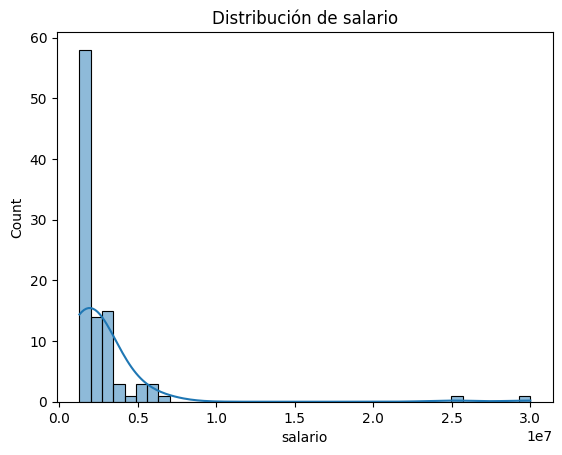

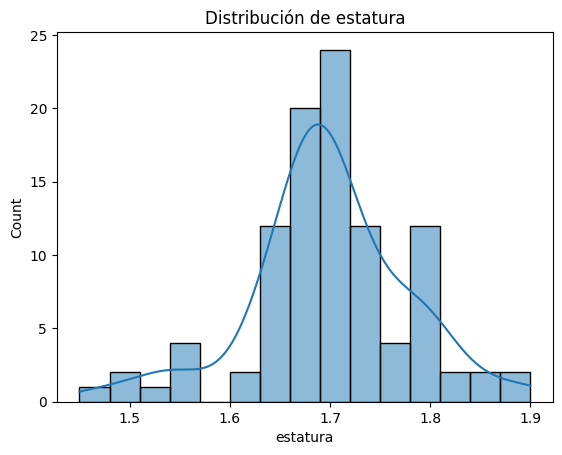

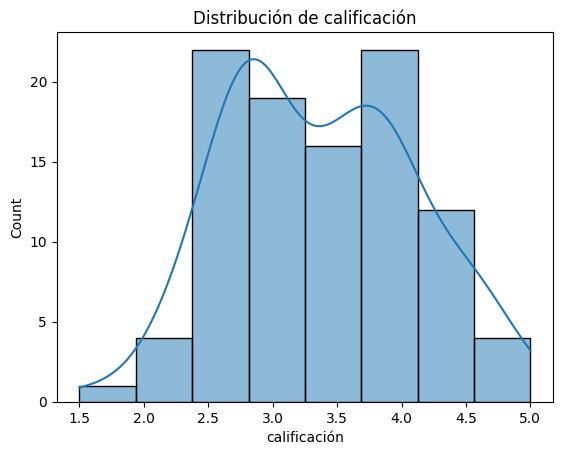

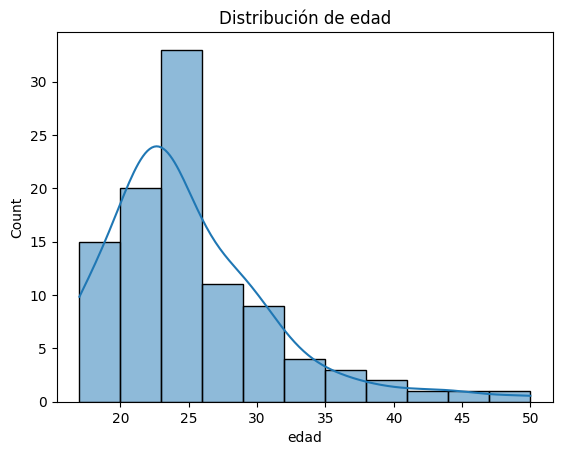

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de distribución para variables numéricas
for column in df.select_dtypes(include=['number']):
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

In [ ]:
# Identificar y manejar valores atípicos (outliers)
for column in df.select_dtypes(include=['number']):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    banda_inferior = Q1 - 1.5 * IQR
    banda_superior = Q3 + 1.5 * IQR
    df = df[(df[column] >= banda_inferior) & (df[column] <= banda_superior)]

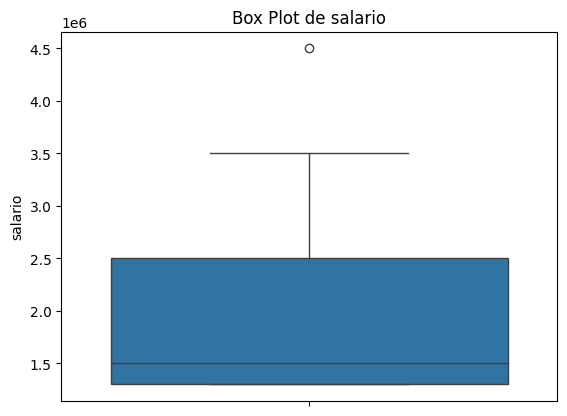

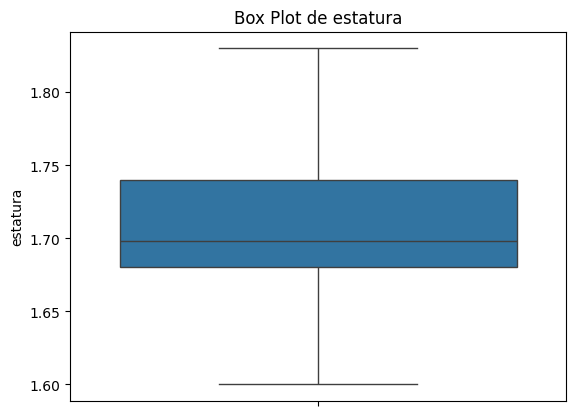

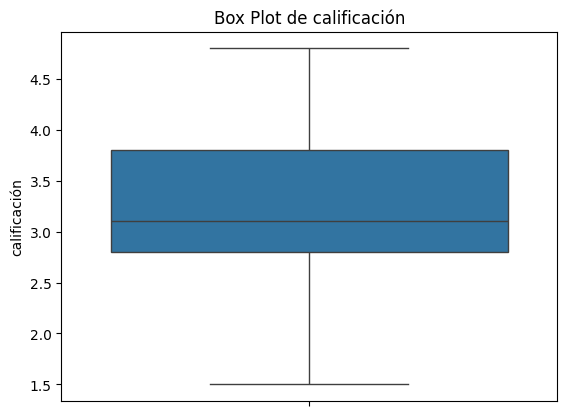

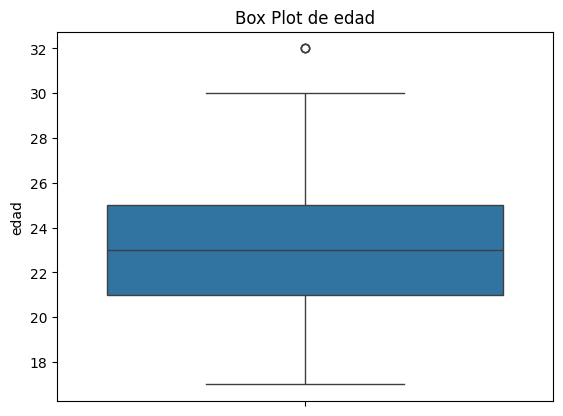

In [ ]:
import matplotlib.pyplot as plt
# Box plot para variables numéricas
for column in df.select_dtypes(include=['number']):
    plt.figure()
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot de {column}')
    plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 0 to 97
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   colombiano        81 non-null     object 
 1   vehiculo          81 non-null     object 
 2   dia de la semana  81 non-null     object 
 3   salario           81 non-null     float64
 4   estatura          81 non-null     float64
 5   calificación      81 non-null     float64
 6   edad              81 non-null     float64
dtypes: float64(4), object(3)
memory usage: 5.1+ KB


# Punto 1

Tomar la columna categórica "colombiano" y convertirla en números usando "OneHotEncoder". Guardar los resultados en un dataframe llamado "df_x"

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder_ohe = OneHotEncoder()
array_encoder = encoder_ohe.fit_transform(df[['colombiano']]).toarray()
encoder_ohe.categories_


[array(['no', 'si'], dtype=object)]

In [ ]:
df_x = pd.DataFrame()
df_x['colombiano_no'] = array_encoder[:,0]
df_x['colombiano_si'] = array_encoder[:,1]
df_x.head()

,colombiano_no,colombiano_si
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


# Punto 2

Tomar la columna categórica "vehículo" y convertirla en números usando "OneHotEncoder". Guardar los resultados en el dataframe llamado "df_x" sin borrar los datos del punto anterior

In [ ]:
encoder_ohe = OneHotEncoder()
array_encoder = encoder_ohe.fit_transform(df[['vehiculo']]).toarray()
encoder_ohe.categories_

[array(['auto', 'bus', 'moto'], dtype=object)]

In [ ]:
df_x['auto'] = array_encoder[:,0]
df_x['bus'] = array_encoder[:,1]
df_x['moto'] = array_encoder[:,2]
df_x.head()

,colombiano_no,colombiano_si,auto,bus,moto
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0


# Punto 3

Tomar la columna categórica "día de la semana" y convertirla en números usando "LabelEncoder". Guardar los resultados en el dataframe llamado "df_x" sin borrar los datos delos puntos anteriores

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder_le = LabelEncoder()
array_encoder = encoder_le.fit_transform(df['dia de la semana'])
array_encoder

array([4, 6, 2, 0, 6, 2, 3, 2, 2, 2, 0, 6, 2, 0, 4, 1, 0, 5, 6, 0, 4, 5,
       6, 0, 4, 5, 6, 0, 4, 5, 6, 0, 4, 5, 6, 1, 0, 1, 0, 1, 0, 4, 5, 6,
       4, 3, 2, 2, 2, 2, 0, 3, 4, 1, 6, 5, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 6, 2, 3, 2, 3, 6, 2, 3, 6])

In [ ]:
df_x['dia de la semana'] = array_encoder
df_x.head()

,colombiano_no,colombiano_si,auto,bus,moto,dia de la semana
0,0.0,1.0,0.0,1.0,0.0,4
1,1.0,0.0,0.0,1.0,0.0,6
2,1.0,0.0,1.0,0.0,0.0,2
3,0.0,1.0,0.0,0.0,1.0,0
4,1.0,0.0,1.0,0.0,0.0,6


# Punto 4

Tomar la columna categórica "día de la semana" y convertirla en números usando "OrdinalEncoder". Comparar los resultados con el punto anterior. Guardar los resultados en el dataframe llamado "df_x" sin borrar los datos delos puntos anteriores

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

orden_deseado = [['lunes','martes','miércoles','jueves','viernes','sábado','domingo']]

# Crear un objeto OrdinalEncoder
encoder_oe = OrdinalEncoder(categories=orden_deseado)

# Aplicar el encoder a la columna
array_encoder = encoder_oe.fit_transform(df[['dia de la semana']])
array_encoder

array([[2.],
       [4.],
       [0.],
       [6.],
       [4.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [6.],
       [4.],
       [0.],
       [6.],
       [2.],
       [3.],
       [6.],
       [5.],
       [4.],
       [6.],
       [2.],
       [5.],
       [4.],
       [6.],
       [2.],
       [5.],
       [4.],
       [6.],
       [2.],
       [5.],
       [4.],
       [6.],
       [2.],
       [5.],
       [4.],
       [3.],
       [6.],
       [3.],
       [6.],
       [3.],
       [6.],
       [2.],
       [5.],
       [4.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [6.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.],
       [6.],
       [0.],
       [0.],
       [0.],
       [6.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [4.],
       [0.],
       [1.],
       [0.],
       [1.],

In [ ]:
df_x['dia de la semana'] = array_encoder
df_x.head()

,colombiano_no,colombiano_si,auto,bus,moto,dia de la semana
0,0.0,1.0,0.0,1.0,0.0,2.0
1,1.0,0.0,0.0,1.0,0.0,4.0
2,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,6.0
4,1.0,0.0,1.0,0.0,0.0,4.0


## Punto 5

5. Tomar la columna numérica "salario" y escalarla usando "MinMaxScaler". Guardar los resultados en el dataframe llamado "df_x" sin borrar los datos de los puntos anteriores

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler_minmax = MinMaxScaler()
array_scaler = scaler_minmax.fit_transform(df[['salario']])
array_scaler

array([[0.        ],
       [0.        ],
       [0.375     ],
       [0.53125   ],
       [0.6875    ],
       [0.        ],
       [1.        ],
       [0.        ],
       [0.        ],
       [0.375     ],
       [0.21875   ],
       [0.375     ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.21875   ],
       [0.53125   ],
       [0.21875   ],
       [0.46275253],
       [0.        ],
       [0.375     ],
       [0.375     ],
       [0.21875   ],
       [0.375     ],
       [0.0625    ],
       [0.625     ],
       [0.375     ],
       [0.0625    ],
       [0.53125   ],
       [0.0625    ],
       [0.375     ],
       [0.0625    ],
       [0.0625    ],
       [0.625     ],
       [0.375     ],
       [0.21875   ],
       [0.0625    ],
       [0.625     ],
       [0.0625    ],
       [0.0625    ],
       [0.21875   ],
       [0.625     ],
       [0.0625    ],
       [0.0625    ],
       [0.0625    ],
       [0.0625    ],
       [0.375

In [ ]:
df_x['salario_minmax'] = array_scaler[:,0]
df_x.head()

,colombiano_no,colombiano_si,auto,bus,moto,dia de la semana,salario_minmax
0,0.0,1.0,0.0,1.0,0.0,2.0,0.00000
1,1.0,0.0,0.0,1.0,0.0,4.0,0.00000
2,1.0,0.0,1.0,0.0,0.0,0.0,0.37500
3,0.0,1.0,0.0,0.0,1.0,6.0,0.53125
4,1.0,0.0,1.0,0.0,0.0,4.0,0.68750


## Punto 6

Tomar la columna numérica "salario" y estandarizarla usando "StandardScaler". Guardar los resultados en el dataframe llamado "df_x" sin borrar los datos delos puntos anteriores

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
array_scaler = scaler_standard.fit_transform(df[['salario']])
array_scaler

array([[-0.87602862],
       [-0.87602862],
       [ 0.71019902],
       [ 1.37112721],
       [ 2.03205539],
       [-0.87602862],
       [ 3.35391176],
       [-0.87602862],
       [-0.87602862],
       [ 0.71019902],
       [ 0.04927084],
       [ 0.71019902],
       [-0.87602862],
       [-0.87602862],
       [-0.87602862],
       [-0.87602862],
       [ 0.04927084],
       [ 1.37112721],
       [ 0.04927084],
       [ 1.08138697],
       [-0.87602862],
       [ 0.71019902],
       [ 0.71019902],
       [ 0.04927084],
       [ 0.71019902],
       [-0.61165734],
       [ 1.76768412],
       [ 0.71019902],
       [-0.61165734],
       [ 1.37112721],
       [-0.61165734],
       [ 0.71019902],
       [-0.61165734],
       [-0.61165734],
       [ 1.76768412],
       [ 0.71019902],
       [ 0.04927084],
       [-0.61165734],
       [ 1.76768412],
       [-0.61165734],
       [-0.61165734],
       [ 0.04927084],
       [ 1.76768412],
       [-0.61165734],
       [-0.61165734],
       [-0

In [ ]:
df_x['salario_standard'] = array_scaler[:,0]
df_x.head()

,colombiano_no,colombiano_si,auto,bus,moto,dia de la semana,salario_minmax,salario_standard
0,0.0,1.0,0.0,1.0,0.0,2.0,0.00000,-0.876029
1,1.0,0.0,0.0,1.0,0.0,4.0,0.00000,-0.876029
2,1.0,0.0,1.0,0.0,0.0,0.0,0.37500,0.710199
3,0.0,1.0,0.0,0.0,1.0,6.0,0.53125,1.371127
4,1.0,0.0,1.0,0.0,0.0,4.0,0.68750,2.032055


## Punto 7

Tomar la columna numérica "estatura" y estandarizarla usando "StandardScaler". Comparar los resultados con el punto anterior. Guardar los resultados en el dataframe llamado "df_x" sin borrar los datos de los puntos anteriores

In [ ]:
scaler_standard = StandardScaler()
array_scaler = scaler_standard.fit_transform(df[['estatura']])
array_scaler

array([[-0.10636329],
       [ 0.87740516],
       [ 0.68065147],
       [ 1.86117361],
       [-0.30311698],
       [-0.10636329],
       [ 2.45143469],
       [-0.10636329],
       [ 0.28714409],
       [-0.49987067],
       [-1.68039282],
       [-0.49987067],
       [-0.10636329],
       [-0.10636329],
       [ 1.86117361],
       [-0.10636329],
       [-2.0739002 ],
       [-1.48363913],
       [-1.28688544],
       [-0.49987067],
       [ 0.28714409],
       [-0.49987067],
       [ 1.66441992],
       [-0.49987067],
       [-0.30311698],
       [-0.30311698],
       [-0.69662437],
       [-0.49987067],
       [-1.28688544],
       [-1.48363913],
       [-0.10636329],
       [ 0.0903904 ],
       [ 1.86117361],
       [ 2.0579273 ],
       [-0.14809892],
       [ 1.46766623],
       [ 1.07415885],
       [ 0.68065147],
       [ 0.48389778],
       [ 0.28714409],
       [-0.30311698],
       [-0.49987067],
       [-0.69662437],
       [-0.30311698],
       [-1.28688544],
       [ 1

In [ ]:
df_x['estatura_standard'] = array_scaler[:,0]
df_x.head()

,colombiano_no,colombiano_si,auto,bus,moto,dia de la semana,salario_minmax,salario_standard,estatura_standard
0,0.0,1.0,0.0,1.0,0.0,2.0,0.00000,-0.876029,-0.106363
1,1.0,0.0,0.0,1.0,0.0,4.0,0.00000,-0.876029,0.877405
2,1.0,0.0,1.0,0.0,0.0,0.0,0.37500,0.710199,0.680651
3,0.0,1.0,0.0,0.0,1.0,6.0,0.53125,1.371127,1.861174
4,1.0,0.0,1.0,0.0,0.0,4.0,0.68750,2.032055,-0.303117


## Punto 8

Tomar la columna numérica "estatura" y dividirla en 3 rangos usando "KBins Discretizer". Guardar los resultados en el dataframe llamado "df_x" sin borrar los datos delos puntos anteriores la columna numérica "calificación" y dividirla en 4 rangos usando "KBins Discretizer". Guardar los resultados en el dataframe llamado "df_x"

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(encode='ordinal',n_bins=3)
array_discretizer = discretizer.fit_transform(df[['estatura']])
array_discretizer

array([[1.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [2.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [2.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [2.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],

In [ ]:
df_x['estatura_discretizada'] = array_discretizer[:,0]
df_x.head()

,colombiano_no,colombiano_si,auto,bus,moto,dia de la semana,salario_minmax,salario_standard,estatura_standard,estatura_discretizada
0,0.0,1.0,0.0,1.0,0.0,2.0,0.00000,-0.876029,-0.106363,1.0
1,1.0,0.0,0.0,1.0,0.0,4.0,0.00000,-0.876029,0.877405,2.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.37500,0.710199,0.680651,2.0
3,0.0,1.0,0.0,0.0,1.0,6.0,0.53125,1.371127,1.861174,2.0
4,1.0,0.0,1.0,0.0,0.0,4.0,0.68750,2.032055,-0.303117,1.0


## Punto 9

Tomar la columna numérica "calificación" y dividirla en 4 rangos usando "KbinsDiscretizer". Guardar los resultados en el dataframe llamado "df_x" siin borrar los datos de los puntos anteriores.



In [ ]:
discretizer = KBinsDiscretizer(encode='ordinal',n_bins=4)
array_discretizer = discretizer.fit_transform(df[['calificación']])
array_discretizer

array([[1.],
       [1.],
       [1.],
       [2.],
       [3.],
       [2.],
       [3.],
       [2.],
       [0.],
       [2.],
       [0.],
       [2.],
       [2.],
       [0.],
       [0.],
       [2.],
       [2.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [3.],
       [0.],
       [3.],
       [0.],
       [3.],
       [3.],
       [0.],
       [2.],
       [1.],
       [1.],
       [0.],
       [2.],
       [3.],
       [1.],
       [0.],
       [1.],
       [2.],
       [2.],
       [3.],
       [1.],
       [3.],
       [1.],
       [3.],
       [3.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [3.],
       [1.],
       [1.],
       [3.],
       [1.],
       [1.],
       [3.],
       [1.],
       [3.],
       [1.],
       [3.],
       [1.],
       [3.],
       [1.],
       [3.],
       [1.],
       [3.],
       [3.],
       [0.],
       [1.],
       [3.],

In [ ]:
df_x['calificación_discretizada'] = array_discretizer[:,0]
df_x.head()

,colombiano_no,colombiano_si,auto,bus,moto,dia de la semana,salario_minmax,salario_standard,estatura_standard,estatura_discretizada,calificación_discretizada
0,0.0,1.0,0.0,1.0,0.0,2.0,0.00000,-0.876029,-0.106363,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,4.0,0.00000,-0.876029,0.877405,2.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.37500,0.710199,0.680651,2.0,1.0
3,0.0,1.0,0.0,0.0,1.0,6.0,0.53125,1.371127,1.861174,2.0,2.0
4,1.0,0.0,1.0,0.0,0.0,4.0,0.68750,2.032055,-0.303117,1.0,3.0


In [ ]:
df.head()

,colombiano,vehiculo,dia de la semana,salario,estatura,calificación,edad
0,si,bus,miércoles,1300000.0,1.70,3.0,23.0
1,no,bus,viernes,1300000.0,1.75,3.0,23.0
2,no,auto,lunes,2500000.0,1.74,3.0,25.0
4,si,moto,domingo,3000000.0,1.80,3.5,28.0
6,no,auto,viernes,3500000.0,1.69,4.2,28.0


## Punto 10

Tomar la columna numérica "edad" y convertirla en 1 0 0 si es mayor de edad o menor de edad usando "binarizer". Guardar los resultados en el dataframe llamado "df_x" sin borrar los datos delos puntos anteriores

In [ ]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=18)
array_binarizer = binarizer.fit_transform(df[['edad']])
array_binarizer

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],

In [ ]:
df_x['edad_binaria'] = array_binarizer[:,0]
df_x.head()

,colombiano_no,colombiano_si,auto,bus,moto,dia de la semana,salario_minmax,salario_standard,estatura_standard,estatura_discretizada,calificación_discretizada,edad_binaria
0,0.0,1.0,0.0,1.0,0.0,2.0,0.00000,-0.876029,-0.106363,1.0,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,4.0,0.00000,-0.876029,0.877405,2.0,1.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.37500,0.710199,0.680651,2.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,6.0,0.53125,1.371127,1.861174,2.0,2.0,1.0
4,1.0,0.0,1.0,0.0,0.0,4.0,0.68750,2.032055,-0.303117,1.0,3.0,1.0


## Punto 11

Usar SelectKBest con chi2 para encontrar las mejores columnas del df

In [ ]:
df_x.head()

,colombiano_no,colombiano_si,auto,bus,moto,dia de la semana,salario_minmax,salario_standard,estatura_standard,estatura_discretizada,calificación_discretizada,edad_binaria
0,0.0,1.0,0.0,1.0,0.0,2.0,0.00000,-0.876029,-0.106363,1.0,1.0,1.0
1,1.0,0.0,0.0,1.0,0.0,4.0,0.00000,-0.876029,0.877405,2.0,1.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.37500,0.710199,0.680651,2.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0,6.0,0.53125,1.371127,1.861174,2.0,2.0,1.0
4,1.0,0.0,1.0,0.0,0.0,4.0,0.68750,2.032055,-0.303117,1.0,3.0,1.0


In [ ]:
df.head()

,colombiano,vehiculo,dia de la semana,salario,estatura,calificación,edad
0,si,bus,miércoles,1300000.0,1.70,3.0,23.0
1,no,bus,viernes,1300000.0,1.75,3.0,23.0
2,no,auto,lunes,2500000.0,1.74,3.0,25.0
4,si,moto,domingo,3000000.0,1.80,3.5,28.0
6,no,auto,viernes,3500000.0,1.69,4.2,28.0


In [ ]:
df_y = pd.DataFrame()

In [ ]:
encoder_le = LabelEncoder()
array_encoder = encoder_le.fit_transform(df['colombiano'])
df_y['colombiano'] = array_encoder
encoder_le = LabelEncoder()
array_encoder = encoder_le.fit_transform(df['vehiculo'])
df_y['vehiculo'] = array_encoder
df_y['salario'] = df_x['salario_minmax']
df_y['estatura'] = df_x['estatura_discretizada']
df_y['edad'] = df_x['edad_binaria']
df_y['calificación'] = df_x['calificación_discretizada']
df_y.head()

,colombiano,vehiculo,salario,estatura,edad,calificación
0,1,1,0.00000,1.0,1.0,1.0
1,0,1,0.00000,2.0,1.0,1.0
2,0,0,0.37500,2.0,1.0,1.0
3,1,2,0.53125,2.0,1.0,2.0
4,0,0,0.68750,1.0,1.0,3.0


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

y = df_y['edad']

# Inicializar SelectKBest con chi2 como función de puntuación
selector = SelectKBest(chi2, k=3)  # Selecciona las 5 mejores características

# Ajustar y transformar los datos
X_selected = selector.fit_transform(df_y, y)

# Obtener los nombres de las características seleccionadas
selected_features = df_y.columns[selector.get_support()]
# Crear un nuevo DataFrame con las características seleccionadas
df_selected = pd.DataFrame(X_selected, columns=selected_features)

# Mostrar el DataFrame con las características seleccionadas
print(df_selected.head())


   colombiano  salario  edad
0         1.0  0.00000   1.0
1         0.0  0.00000   1.0
2         0.0  0.37500   1.0
3         1.0  0.53125   1.0
4         0.0  0.68750   1.0


## Punto 12

Usar SelectKBest con f_regression para encontrar las mejores columnas del df

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Inicializar SelectKBest con f_regression como función de puntuación
selector = SelectKBest(f_regression, k=3)  # Selecciona las 4 mejores características

# Ajustar y transformar los datos
X_selected = selector.fit_transform(df_x, y)

# Obtener los nombres de las características seleccionadas
selected_features = df_x.columns[selector.get_support()]

# Crear un nuevo DataFrame con las características seleccionadas
df_selected = pd.DataFrame(X_selected, columns=selected_features)

# Mostrar el DataFrame con las características seleccionadas
print(df_selected.head())


   salario_minmax  salario_standard  edad_binaria
0         0.00000         -0.876029           1.0
1         0.00000         -0.876029           1.0
2         0.37500          0.710199           1.0
3         0.53125          1.371127           1.0
4         0.68750          2.032055           1.0


## Punto 13

Usar VarianceThreshold para encontrar las mejores columnas del df

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Inicializar VarianceThreshold con un umbral de varianza
selector = VarianceThreshold(threshold=0.3)  # Ajusta el umbral según tus necesidades

# Ajustar y transformar los datos (asumiendo que df_x contiene tus características)
X_selected = selector.fit_transform(df_x)

# Obtener los nombres de las características seleccionadas
selected_features = df_x.columns[selector.get_support()]

# Crear un nuevo DataFrame con las características seleccionadas
df_selected = pd.DataFrame(X_selected, columns=selected_features)

# Mostrar el DataFrame con las características seleccionadas
print(df_selected.head())


   dia de la semana  salario_standard  estatura_standard  \
0               2.0         -0.876029          -0.106363   
1               4.0         -0.876029           0.877405   
2               0.0          0.710199           0.680651   
3               6.0          1.371127           1.861174   
4               4.0          2.032055          -0.303117   

   estatura_discretizada  calificación_discretizada  
0                    1.0                        1.0  
1                    2.0                        1.0  
2                    2.0                        1.0  
3                    2.0                        2.0  
4                    1.0                        3.0  


# Punto 14

Usar SelectPercentile con chi2 para encontrar las mejores columnas del df

In [ ]:
from sklearn.feature_selection import SelectPercentile

# Inicializar SelectPercentile con chi2 como función de puntuación
selector = SelectPercentile(chi2, percentile=30)  # Selecciona el 50% de las mejores características

# Ajustar y transformar los datos
X_selected = selector.fit_transform(df_y, y)

# Obtener los nombres de las características seleccionadas
selected_features = df_y.columns[selector.get_support()]

# Crear un nuevo DataFrame con las características seleccionadas
df_selected = pd.DataFrame(X_selected, columns=selected_features)

# Mostrar el DataFrame con las características seleccionadas
print(df_selected.head())


   salario  edad
0  0.00000   1.0
1  0.00000   1.0
2  0.37500   1.0
3  0.53125   1.0
4  0.68750   1.0


## Punto 15

Usar SelectPercentile con f_regression para encontrar las mejores columnas del df

In [ ]:
# Inicializar SelectPercentile con f_regression como función de puntuación
selector = SelectPercentile(f_regression, percentile=20)  # Selecciona el 50% de las mejores características

# Ajustar y transformar los datos
X_selected = selector.fit_transform(df_x, y)

# Obtener los nombres de las características seleccionadas
selected_features = df_x.columns[selector.get_support()]

# Crear un nuevo DataFrame con las características seleccionadas
df_selected = pd.DataFrame(X_selected, columns=selected_features)

# Mostrar el DataFrame con las características seleccionadas
print(df_selected.head())


   salario_minmax  salario_standard  edad_binaria
0         0.00000         -0.876029           1.0
1         0.00000         -0.876029           1.0
2         0.37500          0.710199           1.0
3         0.53125          1.371127           1.0
4         0.68750          2.032055           1.0
